# Named-entity recognition
> This chapter will introduce a slightly more advanced topic - named-entity recognition. You'll learn how to identify the who, what, and where of your texts using pre-trained models on English and non-English text. You'll also learn how to use some new libraries, polyglot and spaCy, to add to your NLP toolbox. This is the Summary of lecture "Introduction to Natural Language Processing in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Natural_Language_Processing]
- image: images/chunk_pie.png

In [1]:
from pprint import pprint
import matplotlib.pyplot as plt

## Named Entity Recognition
- Named Entity Recognition (NER)
    - NLP task to identify important named entities in the text
        - People, places, organizations
        - Dates, states, works of art
    - Can be used alongside topic identification
    - Who? What? When? Where?

### NER with NLTK
You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use `nltk` to find the named entities in this article.

What might the article be about, given the names you found?

> Note: Before using NER through NLTK, you must install 'averaged_perceptron_tagger', 'maxent_ne_chunker', 'words' packages

In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/chanseok/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/chanseok/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/chanseok/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
with open('./dataset/news_articles/uber_apple.txt', 'r') as file:
    article = file.read()

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE':
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### Charting practice
In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a `defaultdict` called `ner_categories`, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called `chunked_sentences` similar to the last exercise, but this time with non-binary category names.

You can use `hasattr()` to determine if each chunk has a 'label' and then simply use the chunk's `.label()` method as the dictionary key.

In [16]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

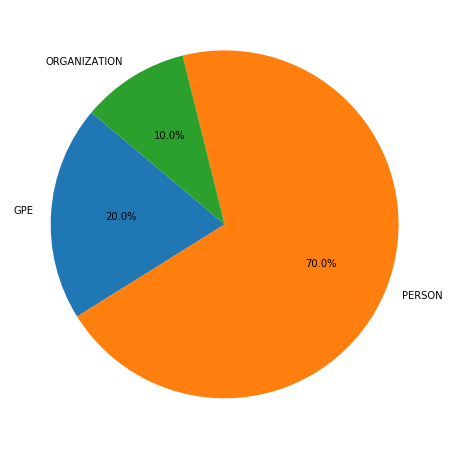

In [17]:
from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the cart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140);

## Introduction to SpaCy
- SpaCy
    - NLP library similar to `gensim`, with different implementations
    - Focuson creating NLP pipelines to generate models and corpora
    - Open source, with extra libraries and tools
        - Displacy
- Why use SpaCy for NER?
    - Easy pipeline creation
    - Different entity types compared to `nltk`
    - Informal language corpora
        - Easily find entities in Tweets and chat messages

### Comparing NLTK with spaCy NER
Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

> Note: To use english model in SpaCy, you need to install appropriate english model:
```bash
python -m spacy download en_core_web_sm
```

In [7]:
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG unroll.me
ORG Apple
PERSON Uber
FAC Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


From NER in `nltk`, we can get `organization`, `GPE`, `person` as a category. In case of `spacy`, we can additionally get `FAC`, `CARDINAL`, `LOC`, `MONEY` as a category.

## Multilingual NER with polyglot
- polyglot
    - NLP library which uses word vectors
    - vectors for many different languages (more than 130)

### French NER with polyglot I
In this exercise and the next, you'll use the `polyglot` library to identify French entities. The library functions slightly differently than `spacy`, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

> Note: Before using polyglot for specific language, you need to download appropriate language model. Also, it requires some dependencies.
```
pip install pyicu
pip install pycld2
pip install morfessor
polyglot download ner2.fr
polyglot download embeddings2.fr
```

In [8]:
!polyglot download ner2.fr
!polyglot download embeddings2.fr

[polyglot_data] Downloading package ner2.fr to
[polyglot_data]     /home/chanseok/polyglot_data...
[polyglot_data]   Package ner2.fr is already up-to-date!
[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /home/chanseok/polyglot_data...
[polyglot_data]   Package embeddings2.fr is already up-to-date!


In [9]:
with open('./dataset/news_articles/french.txt', 'r') as file:
    article = file.read()

In [10]:
from polyglot.text import Text

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


### French NER with polyglot II
Here, you'll complete the work you began in the previous exercise.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.

In [11]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
pprint(entities)

[('I-PER', 'Charles Cuvelliez'),
 ('I-PER', 'Charles Cuvelliez'),
 ('I-ORG', 'Bruxelles'),
 ('I-PER', 'l’IA'),
 ('I-PER', 'Julien Maldonato'),
 ('I-ORG', 'Deloitte'),
 ('I-PER', 'Ethiquement'),
 ('I-LOC', 'l’IA'),
 ('I-PER', '.')]


### Spanish NER with polyglot
You'll continue your exploration of `polyglot` now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

Your specific task is to determine how many of the entities contain the words `"Márquez"` or `"Gabo"` - these refer to the same person in different ways!

In [12]:
!polyglot download ner2.es embeddings2.es

[polyglot_data] Downloading package ner2.es to
[polyglot_data]     /home/chanseok/polyglot_data...
[polyglot_data]   Package ner2.es is already up-to-date!
[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /home/chanseok/polyglot_data...
[polyglot_data]   Package embeddings2.es is already up-to-date!


In [13]:
with open('./dataset/news_articles/spanish.txt', 'r') as file:
    article = file.read()

In [14]:
txt = Text(article)

# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # check whether the entity contains 'Márquez' or 'Gabo'
    if ('Márquez' in ent) or ('Gabo' in ent):
        # Increment count
        count += 1
        
# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

28
0.2978723404255319
